# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [ ]:
TEAM: Nguyễn Duy Thành

# LOAD DATA


In [45]:
# Start your codes here!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("google-play-store.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


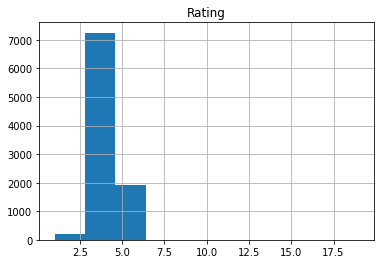

In [7]:
data.hist()
plt.show()

# DATA CLEANING

In [8]:
data.duplicated().value_counts()

False    10358
True       483
dtype: int64

In [9]:
data.drop_duplicates(inplace= True)

In [10]:
data.duplicated().value_counts()

False    10358
dtype: int64

In [11]:
data[data.Rating == 19.]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
data.drop(10472,axis = 0, inplace= True)

In [14]:
not_null_data=data[pd.notnull(data['Rating'])]

median=np.median(not_null_data['Rating'])

In [15]:
data['Rating'].fillna(median,inplace=True)

In [16]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [28]:
data.dropna(inplace=True)

In [29]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [31]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [32]:
data['Installs']=data['Installs'].str.replace(',','').str.replace('+','').astype('int')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [33]:
data['Reviews']=data['Reviews'].astype('int')
data['Rating']=data['Rating'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  int64         
 4   Size            10346 non-null  object        
 5   Installs        10346 non-null  int64         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  object        
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [34]:
data['Size']=data['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

In [35]:
data['Price']=data['Price'].str.replace('$','').astype('float')

In [36]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,10346.00000,1.034600e+04,1.034600e+04,1.034600e+04,10346.000000
mean,4.20377,4.063338e+05,1.816602e+07,1.417266e+07,1.031561
std,0.48573,2.698179e+06,2.214556e+07,8.028090e+07,16.287252
min,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.10000,3.200000e+01,2.700000e+06,1.000000e+03,0.000000
50%,4.30000,1.688500e+03,9.100000e+06,1.000000e+05,0.000000
75%,4.50000,4.659825e+04,2.600000e+07,1.000000e+06,0.000000
max,5.00000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


# DATA ANALYSIS

### List of app with maximum size

Text(0.5, 1.0, 'Most Size Apps in Play Store')

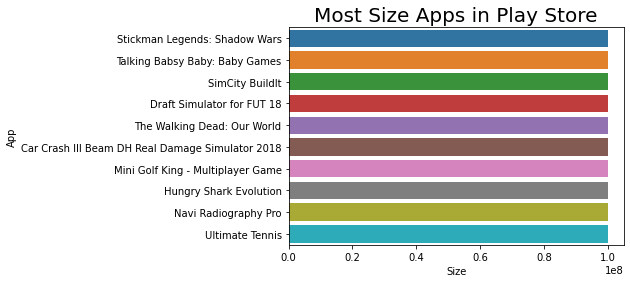

In [48]:
sort = data.sort_values(['Size'],ascending = 0 )[:10]
plot = sns.barplot(x = 'Size' , y = 'App' , data = sort)
plot.set_xlabel('Size')
plot.set_title("Most Size Apps in Play Store", size = 20)

### App with maximum reviews

In [39]:
data[data['Reviews'] == data['Reviews'].max()]['App'].iloc[0]

'Facebook'

### App with most of installs

In [41]:
data[data['Installs'] == data['Installs'].max()]['App'].iloc[0]

'Google Play Books'

### App with maximum price

In [42]:
print(data[data['Price'] == data['Price'].max()]['App'].iloc[0], data['Price'].max())

I'm Rich - Trump Edition 400.0


### Number of paid app and free app

In [49]:
print("Free Apps",len(data[data['Type'] == "Free"]))
print("Paid Apps",len(data[data['Type'] == "Paid"]))

Free Apps 9584
Paid Apps 762


### List of top 10 categories app 

Text(0, 0.5, 'Number of Install')

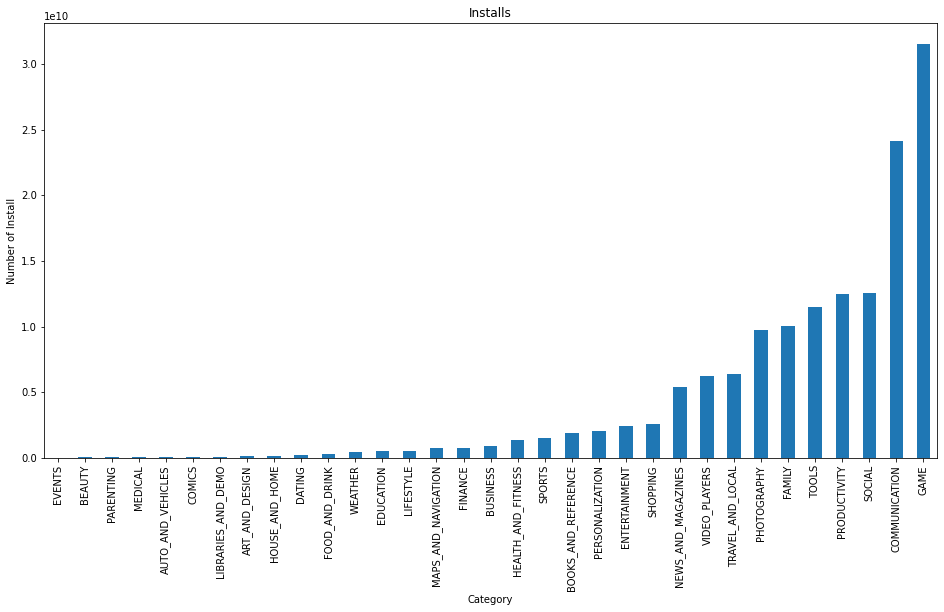

In [52]:
plt.figure(figsize=(16,8))
data.groupby('Category').sum().sort_values(by='Installs',ascending='False')['Installs'].plot(kind='bar',title='Installs', fontsize=10)
plt.ylabel('Number of Install') 

App with maximum rating

In [54]:
data[data['Rating'] == data['Rating'].max()]['App'].iloc[0]

'Hojiboy Tojiboyev Life Hacks'

# Visualize data

Em không load dữ liệu file csv lên google data studio được nên cho em Visualize ở đây luôn ạ.

### Content rating Visualization


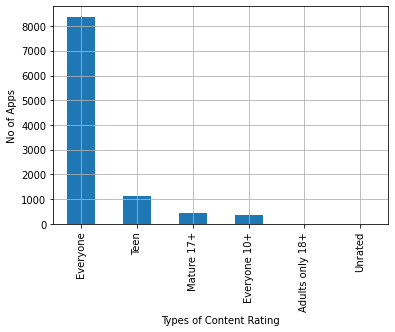

In [55]:
data["Content Rating"].value_counts().plot(kind='bar')
plt.ylabel("No of Apps")
plt.xlabel("Types of Content Rating")
plt.grid()
plt.show()

### Type of apps

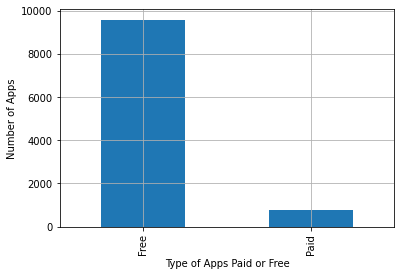

In [56]:
data["Type"].value_counts().plot(kind='bar')
plt.grid()
plt.xlabel("Type of Apps Paid or Free")
plt.ylabel("Number of Apps")
plt.show()

### Distribution of Rating

Text(0.5, 1.0, 'Distribution of Rating')

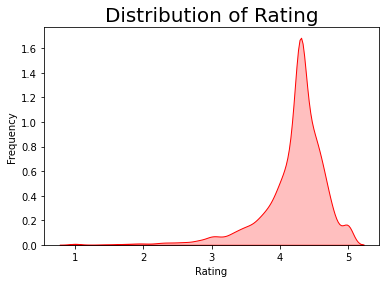

In [58]:
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

### Average price of each category

Text(0, 0.5, 'Average price ')

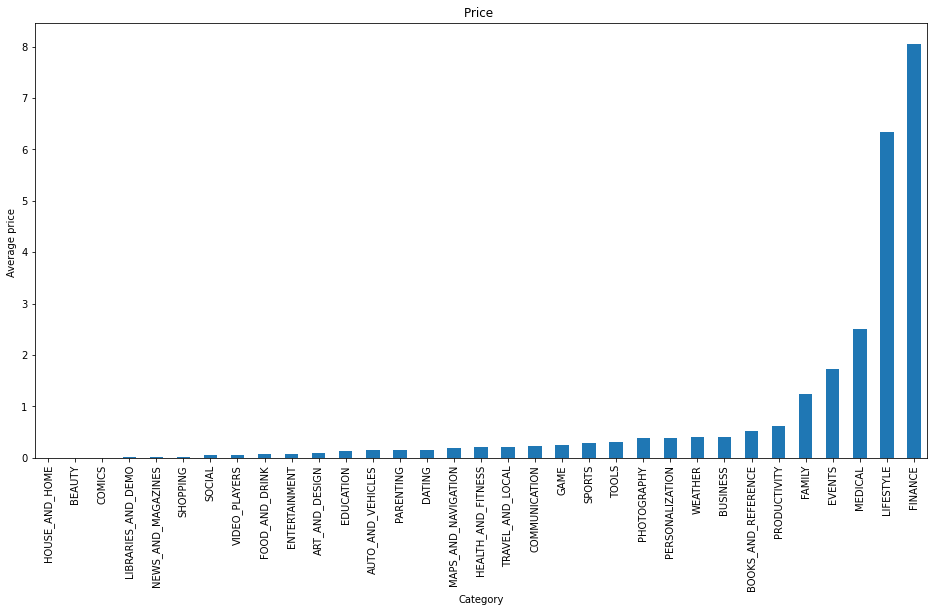

In [59]:
plt.figure(figsize=(16,8)) 
data.groupby('Category').mean().sort_values(by='Price',ascending='False')['Price'].plot(kind='bar',title='Price ', fontsize=10)
plt.ylabel('Average price ')

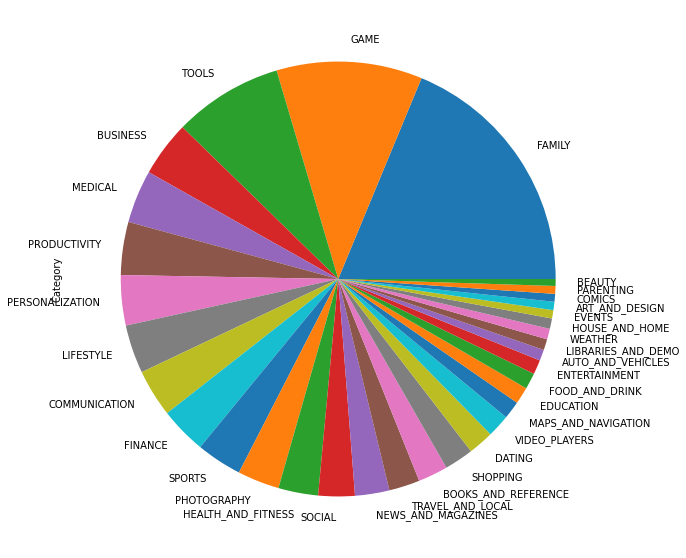

In [67]:
plt.figure(figsize = (10,10))
data["Category"].value_counts().plot(kind='pie')
plt.show()

### Price of app distribution


No handles with labels found to put in legend.


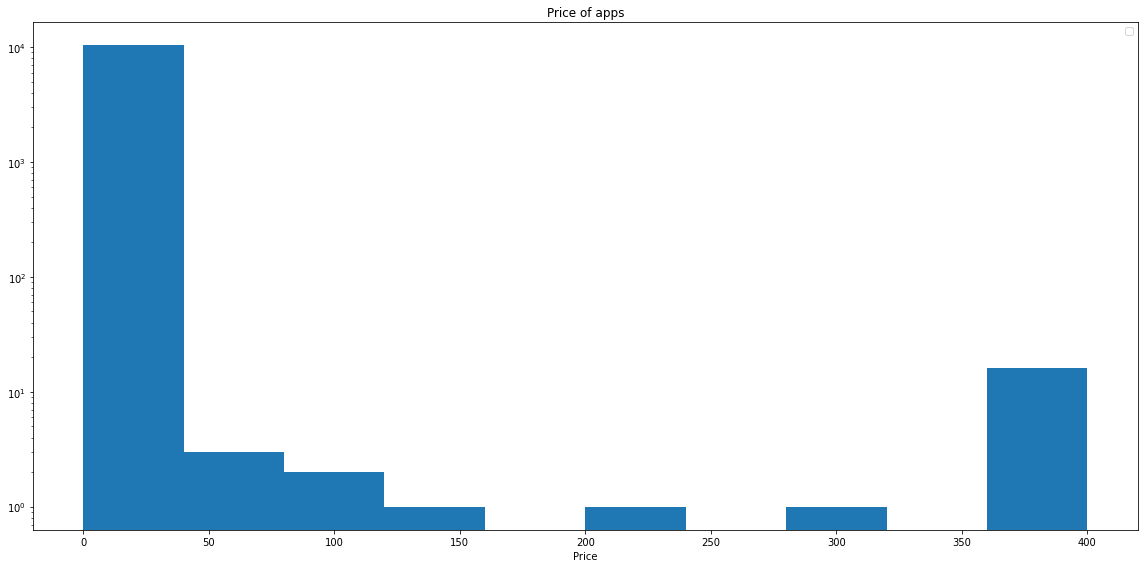

In [60]:
plt.figure(figsize=(16,8)) 
plt.hist(data['Price'], log=True)
plt.title("Price of apps")
plt.xlabel('Price')
plt.tight_layout()
plt.legend()

### Rating and review

Text(0, 0.5, 'Rating')

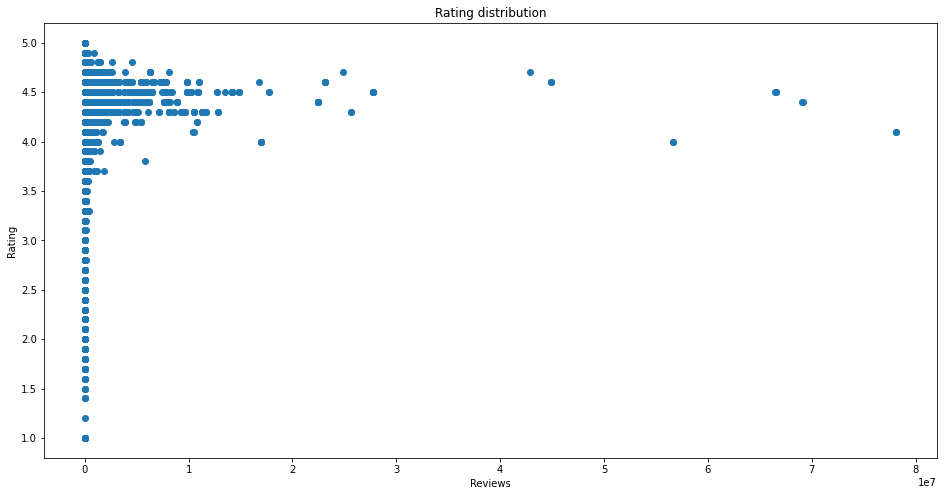

In [66]:
plt.figure(figsize=(16,8)) 
plt.scatter(data['Reviews'],data['Rating'])
plt.title('Rating distribution')
plt.xlabel('Reviews')
plt.ylabel('Rating')

#Predict Rating based on Review

Text(0, 0.5, 'Rating')

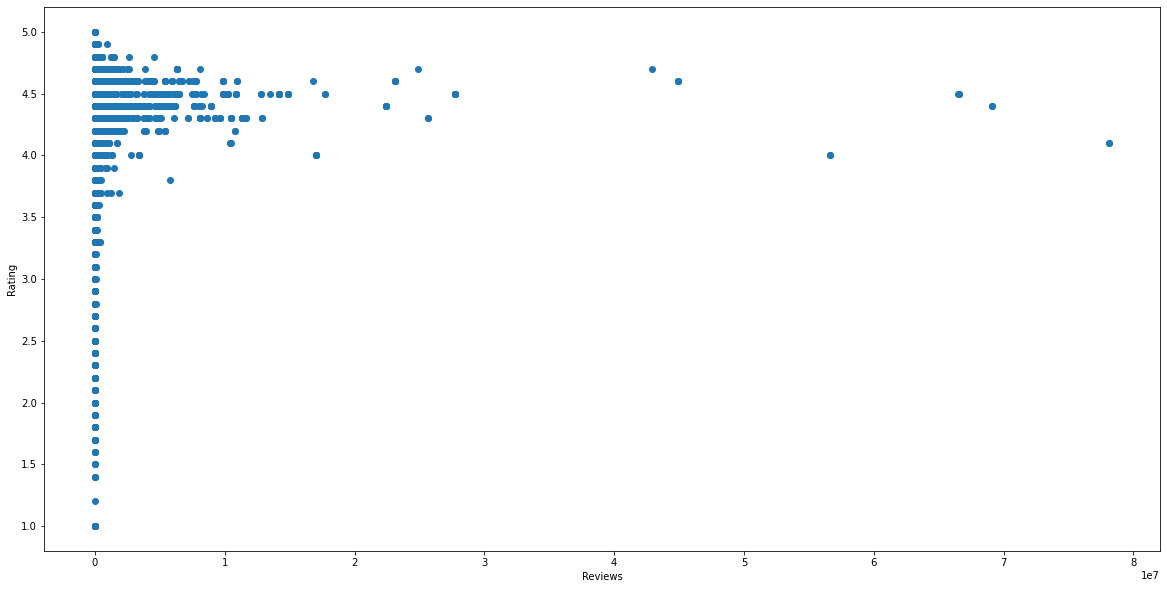

In [104]:
# Plot data
plt.figure(figsize=(20,10)) 
plt.scatter(data['Reviews'],data['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Reviews']], data['Rating'], test_size=0.2, random_state=68)

In [96]:
X_train = X_train.sort_index()
y_train = y_train.sort_index()

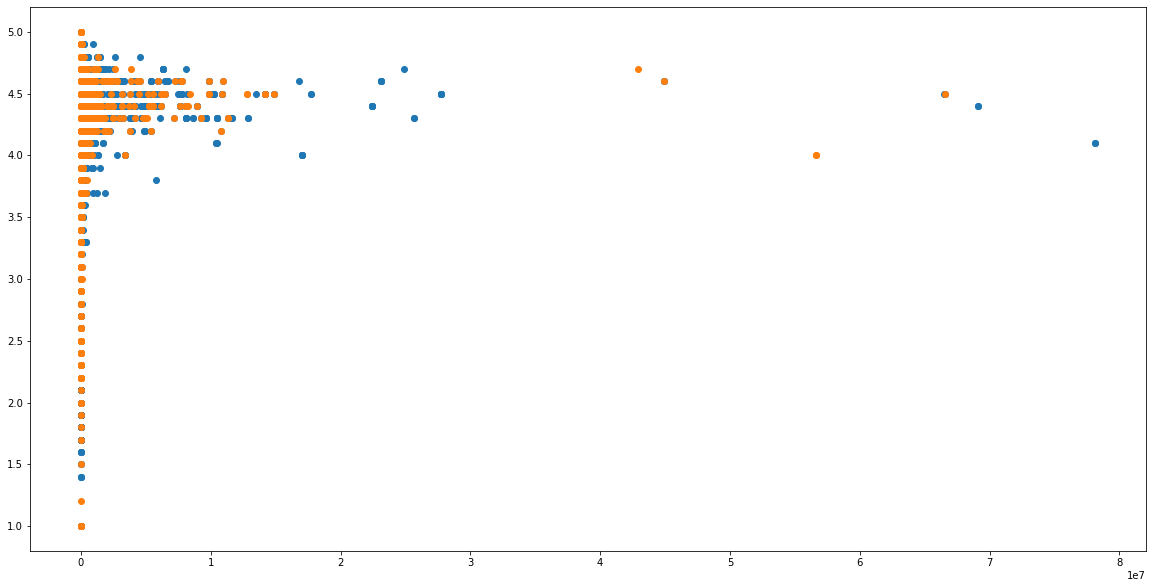

In [97]:
plt.figure(figsize=(20,10))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [99]:
def plot_poly_linear_regression(degree=10):
    
    poly_reg = PolynomialFeatures(degree)
    poly_reg.fit(X_train)
    X_train_poly = poly_reg.transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    lm = LinearRegression()
    lm.fit(X_train_poly, y_train)

    y_train_predict = lm.predict(X_train_poly)
    y_test_predict = lm.predict(X_test_poly)
    
    # calculate the residual errors 
    train_error = np.sqrt(np.mean(np.square(y_train_predict - y_train))) # or sklearn.metrics.mean_squared_error
    test_error = np.sqrt(np.mean(np.square(y_test_predict - y_test)))
                          
    # Visualization
    plt.figure(figsize=(20, 10))
    plt.scatter(X_train, y_train, label='Train')
    plt.scatter(X_test, y_test, label='Test')
    
    X_train_2 = np.linspace(X_train.min(), X_train.max(), 100)
    plt.plot(X_train_2, lm.predict(poly_reg.fit_transform(X_train_2.reshape(-1, 1))), label='Predict')
    plt.title('Train error: {:.3f}\nTest error: {:.3f}\n'.format(train_error, test_error))
    plt.legend(loc="best")
    plt.show()

In [100]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [101]:
p = interactive(plot_poly_linear_regression, degree=(1, 20, 1))
display(p)

interactive(children=(IntSlider(value=10, description='degree', max=20, min=1), Output()), _dom_classes=('widg…